# Wrangle and Analyze Data

## Introduction
The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets. The Twitter archive is great, but it only contains very basic tweet information. Our goal is to do more screening and polishing this data set for better analysis and to crete interesting visualizations. The goal of this project is divided in three steps: Gather, Asses and Clean. This systematic process will guide us to achieve important insights about dogs that people love.

## Table of Contents
1. Gather Data
    * Enhanced Twitter Archive
    * Image Predictions File
    * Download Tweet JSON Data by API query
2. Asses Data
3. Clean Data
4. Analyze Data

In [2]:
## Load python packages and libraries

In [3]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sb
sb.set(style="darkgrid")

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

# Gather Data

## 1. Enhanced Twitter Archive
The twitter-archive-enhanced.csv file is provided in downloadable form and we will store it.


In [4]:
# load the provided enhanced twitter archive file into a DataFrame
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [5]:
twitter_archive_df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

Let's see one sample tweet to observe all the columns and thier vaule at a time.

In [6]:
tweet_sample = twitter_archive_df.loc[5]
tweet_sample

tweet_id                      891087950875897856                                                                                                                                                
in_reply_to_status_id         NaN                                                                                                                                                               
in_reply_to_user_id           NaN                                                                                                                                                               
timestamp                     2017-07-29 00:08:17 +0000                                                                                                                                         
source                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                
text                          Here 

In [7]:
tweet_sample.expanded_urls

'https://twitter.com/dog_rates/status/891087950875897856/photo/1'

In [8]:
tweet_sample.text

"Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh"

In [9]:
tweet_sample.source

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

## 2. Image Predictions File

### image_predictions.tsv

This file contains the tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file is also hosted on Udacity's servers and is downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [10]:
# use requests to send request with the url to the server and save the response in the variable response

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#url = https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
response = requests.get(url)
response


<Response [200]>

In [11]:
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)

In [12]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep = '\t', engine = 'python')
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
#explore the data
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
#check one sample from image_predictions_df

image_predictions_df.loc[2]

tweet_id    666033412701032449                             
jpg_url     https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
img_num     1                                              
p1          German_shepherd                                
p1_conf     0.596461                                       
p1_dog      True                                           
p2          malinois                                       
p2_conf     0.138584                                       
p2_dog      True                                           
p3          bloodhound                                     
p3_conf     0.116197                                       
p3_dog      True                                           
Name: 2, dtype: object

## 3. Download Tweet JSON Data by API query

Query the Twitter API using Python's Tweepy library to get the entire set of JSON data for each of the tweets in the WeRateDogs Twitter archive. Each tweet's JSON data is written to its own line in a file called tweet_json.txt file.

In [15]:
#Create an API object

consumer_key = '*****'
consumer_secret = '*****'
access_token = '*****'
access_secret = '*****'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [16]:
#run a test run with the api to see the status data we get and the json
tweet_test=api.get_status(892420643555336193, tweet_mode='extended')
tweet_test
tweet_test._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

### Save JSON data to file

In [17]:
# Get a list of tweet_ids from the enhanced twitter archive to use for 
# downloading with the Twitter API

count = 0
tweet_json_list = []
tweet_errors_dict = {}

start_time = time.time()

for tweet_id in twitter_archive_df.tweet_id:
    count += 1
    try:
        # attempt to get the tweet's JSON data and append to the tweet JSON list
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        tweet_json_list.append(tweet._json)
    except tweepy.TweepError as err:
        # save the error to the fail dictionary for review
        print("TweepError for id:  " + str(tweet_id))
        tweet_errors_dict[tweet_id] = err
        pass
    # To save space, only print out loop/tweet id for every 100th tweet
    if count % 100 == 0:
        print("loop # " + str(count))

elapsed_time = time.time() - start_time

elapsed_time_str = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print("\nTime elapsed (HH:MM:SS):  " + elapsed_time_str + "\n")

# display list of tweets with errors
print("Number of TweepErrors:  {}\n".format(len(tweet_errors_dict)))
for tweet_id in tweet_errors_dict:
    print(tweet_id, tweet_errors_dict[tweet_id])

TweepError for id:  888202515573088257
TweepError for id:  873697596434513921
loop # 100
TweepError for id:  872668790621863937
TweepError for id:  872261713294495745
TweepError for id:  869988702071779329
TweepError for id:  866816280283807744
TweepError for id:  861769973181624320
TweepError for id:  856602993587888130
loop # 200
TweepError for id:  851953902622658560
TweepError for id:  845459076796616705
TweepError for id:  844704788403113984
TweepError for id:  842892208864923648
TweepError for id:  837366284874571778
TweepError for id:  837012587749474308
loop # 300
TweepError for id:  829374341691346946
TweepError for id:  827228250799742977
loop # 400
loop # 500
TweepError for id:  812747805718642688
TweepError for id:  802247111496568832
Rate limit reached. Sleeping for: 317
loop # 600
loop # 700
TweepError for id:  779123168116150273
TweepError for id:  775096608509886464
loop # 800
TweepError for id:  771004394259247104
TweepError for id:  770743923962707968
TweepError for i

In [18]:
#create the tweet_json.txt file if it doesn't exist for storing the json of each tweet_id
file_name='tweet_json.txt'
#if not os.path.exists(file_name):
with open(file_name, 'w') as file:
    for tweet_json in tweet_json_list:
        json.dump(tweet_json, file)
        file.write('\n')

### Read in JSON data to DataFrame
Extract the required fields from each tweet's JSON data and store in a separate file, tweet_data_extra.csv, for use during the assessment phase.

In [19]:
# read in the JSON data from the text file, and save to a DataFrame
tweet_json_data = []

with open(file_name, 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        data = json.loads(line)

        # extract variables from the JSON data
        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']
        
        # create a dictionary with the JSON data, then add to a list
        json_data = {'tweet_id': data_id, 
                     'retweet_count': data_retweet_count, 
                     'favorite_count': data_favorite_count
                    }
        tweet_json_data.append(json_data)

        # read the next line of JSON data
        line = json_file.readline()
        # ----- while -----

# convert the tweet JSON data dictionary list to a DataFrame
tweet_data_extra_df = pd.DataFrame(tweet_json_data, 
                                   columns = ['tweet_id',
                                              'retweet_count',
                                              'favorite_count'])

tweet_data_extra_df.head(30)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7488,35460
1,892177421306343426,5557,30695
2,891815181378084864,3680,23089
3,891689557279858688,7665,38744
4,891327558926688256,8267,37028
5,891087950875897856,2767,18664
6,890971913173991426,1797,10848
7,890729181411237888,16770,59771
8,890609185150312448,3822,25687
9,890240255349198849,6508,29320


In [20]:
tweet_data_extra_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [21]:
tweet_data_extra_df.to_csv('tweet_data_extra.csv', index = False)

## Assess Data

Both visual inspection and programmatic analysis are important at this section of collected data assessment to erase for quality and tidiness issues. One of the key requirements is that only tweets with original ratings with images, no retweets,be considered.

The quality of data is assessed against dimensions or criteria concerning the content: completeness, validity, accuracy and consistency.

Tidiness of data is assessed with regard to structure according to the rules defined by Hadley Wikham.



In [285]:
json_data = pd.read_csv('tweet_data_extra.csv')

In [286]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [287]:
json_data.nunique()

tweet_id          2331
retweet_count     1675
favorite_count    1965
dtype: int64

In [288]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [289]:
image_predictions_df.nunique()

tweet_id    2075
jpg_url     2009
img_num     4   
p1          378 
p1_conf     2006
p1_dog      2   
p2          405 
p2_conf     2004
p2_dog      2   
p3          408 
p3_conf     2006
p3_dog      2   
dtype: int64

Let's check the twitter_archive_df table and dig into more who see what inconsistency, quality and tidiness issues are hidden. We can start looking into each columns and their properies in details in order to surface out inconsistency of data.

In [290]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### NOTES:

The info() method reveals several quality and tidiness issues:

* There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
* There are 78 replies (in_reply_to_status_id, in_reply_to_user_id)
* There are 2297 tweets with expanded_urls (links to images) indicating 59 tweets with missing data
* The timestamp field is in string format (object)
* There are 4 columns for dog stages (doggo, floofer, pupper, puppo)
* The columns related to retweets are not applicable for original tweets
* The columns related to replies are not applicable for original tweets

### name
Let's start with 'name' column.

* From unique value of 'name' column, I found that there are several names those are common among dogs(total 957 unique names).Also visual assesment(USING EXCEL) showed some weired names such as 'a', 'an', 'one', 'my' etc are present in that column. We should check by printing the value of the 'name' column programmatically to see what we can exclude from the archive. 
* There are 745 rows with name 'none'. So we should drop them as well in cleaning session. 


In [291]:
# display 'name' variable
pd.set_option("display.max_rows", None)
twitter_archive_df.name.value_counts()

None              745
a                 55 
Charlie           12 
Cooper            11 
Oliver            11 
Lucy              11 
Penny             10 
Tucker            10 
Lola              10 
Winston           9  
Bo                9  
the               8  
Sadie             8  
an                7  
Bailey            7  
Toby              7  
Buddy             7  
Daisy             7  
Koda              6  
Jax               6  
Dave              6  
Jack              6  
Rusty             6  
Scout             6  
Milo              6  
Stanley           6  
Bella             6  
Leo               6  
Oscar             6  
Phil              5  
Oakley            5  
Finn              5  
Bentley           5  
Chester           5  
Alfie             5  
Sammy             5  
very              5  
George            5  
Louis             5  
Gus               5  
Larry             5  
Sunny             5  
Clark             4  
Loki              4  
quite             4  
Chip      

It looks like the dog names are all capitalized, so words that begin in lowercase are probably not names, like "a", "the" and "an". Here's the list of these "names".

In [292]:
# list all names that are NOT capitalized
err_names_mask = twitter_archive_df.name.str.contains('^[a-z]', regex = True)
twitter_archive_df[err_names_mask].name.value_counts().sort_index();
len(twitter_archive_df[err_names_mask]);

This list contains non-capitalized words from the name column for 109 tweets, none of which are a valid name.

### rating_denominator
Another issue is with rating_numerator and rating_denominator column.  The visual inspection from excel file revealed that there are neumerator and denominator value of more than two digits. Let's explore that by looking at the statistics of those two columns' values. Also the datatype is int. We should convert them from int to float type.  

In [293]:
## change rating_numerator and rating_denominator datatype from int to float


twitter_archive_df.rating_denominator.astype(float)

0       10.0 
1       10.0 
2       10.0 
3       10.0 
4       10.0 
5       10.0 
6       10.0 
7       10.0 
8       10.0 
9       10.0 
10      10.0 
11      10.0 
12      10.0 
13      10.0 
14      10.0 
15      10.0 
16      10.0 
17      10.0 
18      10.0 
19      10.0 
20      10.0 
21      10.0 
22      10.0 
23      10.0 
24      10.0 
25      10.0 
26      10.0 
27      10.0 
28      10.0 
29      10.0 
30      10.0 
31      10.0 
32      10.0 
33      10.0 
34      10.0 
35      10.0 
36      10.0 
37      10.0 
38      10.0 
39      10.0 
40      10.0 
41      10.0 
42      10.0 
43      10.0 
44      10.0 
45      10.0 
46      10.0 
47      10.0 
48      10.0 
49      10.0 
50      10.0 
51      10.0 
52      10.0 
53      10.0 
54      10.0 
55      10.0 
56      10.0 
57      10.0 
58      10.0 
59      10.0 
60      10.0 
61      10.0 
62      10.0 
63      10.0 
64      10.0 
65      10.0 
66      10.0 
67      10.0 
68      10.0 
69      10.0 
70      10.0 
71    

In [294]:
twitter_archive_df.rating_numerator.astype(float)

0       13.0  
1       13.0  
2       12.0  
3       13.0  
4       12.0  
5       13.0  
6       13.0  
7       13.0  
8       13.0  
9       14.0  
10      13.0  
11      13.0  
12      13.0  
13      12.0  
14      13.0  
15      13.0  
16      12.0  
17      13.0  
18      13.0  
19      13.0  
20      12.0  
21      13.0  
22      14.0  
23      13.0  
24      13.0  
25      12.0  
26      13.0  
27      13.0  
28      13.0  
29      12.0  
30      12.0  
31      13.0  
32      12.0  
33      12.0  
34      13.0  
35      14.0  
36      13.0  
37      13.0  
38      12.0  
39      13.0  
40      13.0  
41      14.0  
42      13.0  
43      12.0  
44      12.0  
45      5.0   
46      13.0  
47      13.0  
48      13.0  
49      12.0  
50      13.0  
51      13.0  
52      13.0  
53      12.0  
54      13.0  
55      17.0  
56      14.0  
57      12.0  
58      13.0  
59      12.0  
60      12.0  
61      12.0  
62      11.0  
63      13.0  
64      14.0  
65      12.0  
66      13

In [295]:
twitter_archive_df[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


For rating_numerator and rating_denominator, the describe() method shows us some quality issues:

* The max values are huge: 1776, 170.
* The minimum is 0 for both.

In [296]:
twitter_archive_df.rating_denominator.value_counts().sort_index(ascending = False)

170    1   
150    1   
130    1   
120    1   
110    1   
90     1   
80     2   
70     1   
50     3   
40     1   
20     2   
16     1   
15     1   
11     3   
10     2333
7      1   
2      1   
0      1   
Name: rating_denominator, dtype: int64

In [297]:
# total no of tweets that DO NOT have denominator 10
sum(twitter_archive_df.rating_denominator != 10.0)


23

It's interesting that many of the larger numbers are multiples of 10. When looking at some of those tweets we see that there is more than 1 dog in the photo. Ignoring the retweets and replies we have the following list.

In [298]:
# display tweets that do NOT have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (twitter_archive_df.rating_denominator != 10.0) & \
            twitter_archive_df.in_reply_to_status_id.isna() & \
           twitter_archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive_df[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,820690176645140481,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,810984652412424192,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,758467244762497024,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",740373189193256964,9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,731156023742988288,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,722974582966214656,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,716439118184652801,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,713900603437621249,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,710658690886586372,80,80
1274,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",709198395643068416,45,50


In [299]:
sum(mask_find)

17

Ignoring the replies and retweets, there are 17 tweets with denominators that aren't 10.

Many of these which are multiples of 10 are about multiple dogs, and the text indicates this, like "floofs", "puppers", "squad" and "pups". I'll just drop the tweets for multiples, but I'll reset the rating for single dogs.



In [300]:
# Let's check one of the ID which mention multiple puppers.
twitter_archive_df.iloc[1254].expanded_urls

'https://twitter.com/dog_rates/status/710658690886586372/photo/1'

### rating_numerator

In [301]:
twitter_archive_df.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
960     1  
666     1  
420     2  
204     1  
182     1  
165     1  
144     1  
143     1  
121     1  
99      1  
88      1  
84      1  
80      1  
75      2  
60      1  
50      1  
45      1  
44      1  
27      1  
26      1  
24      1  
20      1  
17      1  
15      2  
14      54 
13      351
12      558
11      464
10      461
9       158
8       102
7       55 
6       32 
5       37 
4       17 
3       19 
2       9  
1       9  
0       2  
Name: rating_numerator, dtype: int64

In [302]:
sum(twitter_archive_df.rating_numerator >= 15)

28

The output above shows ALL the rating_numerator values, showing a count of 28 tweets with numerator >= 15. Next, looking at ONLY those ratings with denominators = 10, the results are as follows:

In [303]:
# display tweet counts and neumerator rating that have denominator rating of 10
tweets_denom_10_df = twitter_archive_df[twitter_archive_df.rating_denominator == 10]
tweets_denom_10_df.rating_numerator.value_counts().sort_index(ascending = False)

1776    1  
666     1  
420     2  
182     1  
75      2  
27      1  
26      1  
17      1  
15      2  
14      54 
13      351
12      558
11      463
10      461
9       156
8       102
7       54 
6       32 
5       37 
4       15 
3       19 
2       9  
1       8  
0       2  
Name: rating_numerator, dtype: int64

In [304]:

sum(tweets_denom_10_df.rating_numerator >= 15)

12

There are 12 with numerators >= 15(Looking ONLY at tweets that have denominators = 10). I chose 15 as the lower boundary because it's got just 2 counts, while 14 has a count of 54. We can check the texts to see if the numerator makes sense.

NOTE: The next queries ignore retweets and replies.

In [305]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (twitter_archive_df.rating_denominator == 10) & \
            (twitter_archive_df.rating_numerator >= 15) & \
            twitter_archive_df.in_reply_to_status_id.isna() & \
            twitter_archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive_df[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,670842764863651840,420,10


In [306]:
twitter_archive_df[twitter_archive_df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator','tweet_id']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator,tweet_id
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,883482846933004288
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,832215909146226688
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,786709082849828864
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,778027034220126208
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,681340665377193984
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,680494726643068929


Here we have 5 tweets (excluding retweets and replies) with denominator = 10 and numerator >= 15. We also checked if there is any rating_numerator value that has decimals (in text section) but wrongly extracted and placed in rating_numerator column.Looking at the text column we see ratings with decimals or huge numbers,tweets with decimals can be added manually to rating_numerator column replacting current values.

Since there are so few (rating_numerator of 1776 and 420), and I don't want to impose a rating myself, I'll ignore these tweets and drop them.

In [307]:
# display tweets with numerator = 0 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_find = (twitter_archive_df.rating_denominator == 10) & \
            (twitter_archive_df.rating_numerator == 0) & \
            twitter_archive_df.in_reply_to_status_id.isna() & \
            twitter_archive_df.retweeted_status_id.isna()

mask_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
twitter_archive_df[mask_find][mask_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,835152434251116546,0,10


And here is the last tweet with numerator (rating) of '0' which looks legit!

### source

In [308]:
twitter_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

There are only 4 types of sources, and they can be simplified by using the display string portion just before the final "<\a>":

* Twitter for iPhone
* Vine - Make a Scene
* Twitter Web Client
* TweetDeck

### doggo, floofer,pupper, puppo
 

In [309]:

twitter_archive_df['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [310]:
twitter_archive_df['floofer'].value_counts()

None       2346
floofer    10  
Name: floofer, dtype: int64

In [311]:
twitter_archive_df[twitter_archive_df['floofer'] == 'floofer']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
46,883360690899218434,NaN,NaN,2017-07-07 16:22:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883360690899218434/photo/1,13,10,Grizzwald,None,floofer,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None
582,800388270626521089,NaN,NaN,2016-11-20 17:20:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1,https://twitter.com/dog_rates/status/800388270626521089/photo/1",12,10,Doc,None,floofer,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1,https://twitter.com/dog_rates/status/776218204058357768/photo/1",13,10,None,None,floofer,None,None
984,749317047558017024,NaN,NaN,2016-07-02 19:01:20 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749317047558017024/video/1,12,10,Blu,None,floofer,None,None
1022,746542875601690625,NaN,NaN,2016-06-25 03:17:46 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid by @categoen) https://t.co/6ZRoZUWFmd,NaN,NaN,NaN,https://vine.co/v/5uZYwqmuDeT,11,10,None,None,floofer,None,None
1091,737445876994609152,NaN,NaN,2016-05-31 00:49:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Just wanted to share this super rare Rainbow Floofer in case you guys haven't seen it yet. 13/10 colorful af https://t.co/CaG9MzD3WT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/737445876994609152/photo/1,13,10,None,None,floofer,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Moose. He's a Polynesian Floofer. Dapper af. 10/10 would pet diligently https://t.co/mVfqRdppTL,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306246479872/photo/1,10,10,Moose,None,floofer,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here we are witnessing a rare High Stepping Alaskan Floofer. 12/10 dangerously petable (vid by @TheMrsNux) https://t.co/K4s9IJh2jm,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
1614,685307451

In [312]:
twitter_archive_df[['doggo','floofer','pupper','puppo']].describe()

,doggo,floofer,pupper,puppo
count,2356,2356,2356,2356
unique,2,2,2,2
top,None,None,None,None
freq,2259,2346,2099,2326


These four columns state the different dog stages with two unique values.

Using the floofer category as an example, it looks like there are a few ways that this type is spelled: "floofer", "floofiest", and "Floofer".
The other dog stage types may be similar in the variety of spelling.

### expanded_url


In [313]:
# number of tweets with missing urls
sum(twitter_archive_df.expanded_urls.isna())

59

In [314]:

# how many tweets with missing urls are replies or retweets?
sum(twitter_archive_df.expanded_urls.isna() & \
    (twitter_archive_df.in_reply_to_status_id.notnull() | \
     twitter_archive_df.retweeted_status_id.notnull()))

56

In [315]:
# display tweets that are missing urls, and are NOT replies and are NOT retweets
mask = twitter_archive_df.expanded_urls.isna() & \
       twitter_archive_df.in_reply_to_status_id.isna() & \
       twitter_archive_df.retweeted_status_id.isna()
twitter_archive_df[mask][['tweet_id', 'text', 'expanded_urls']]


,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 would listen,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


Of the 59 tweets that are missing data in expanded_urls, 56 are replies or retweets. The remaining 3 tweets (at indexes 375, 707 and 1445) with NaN in the expanded_urls column all have valid ratings but no urls within the text column.

The question now is whether these tweets are part of the predictions or json_data tables.

In [316]:
# are any of these tweets in the predictions table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = image_predictions_df.tweet_id.isin(tweet_set)
sum(find_tweet_id)

0

In [317]:
# are any of these tweets in the json_data table?
tweet_set = [828361771580813312, 785515384317313025, 696518437233913856]
find_tweet_id = json_data.tweet_id.isin(tweet_set)
json_data[find_tweet_id]

,tweet_id,retweet_count,favorite_count
360,828361771580813312,172,2162
689,785515384317313025,1250,6105
1421,696518437233913856,1665,3815


It turns out that these 3 tweets are NOT in the predictions table, and even though they ARE in the json_data table, there was NO image url extracted from the JSON data.

### image predictions

In [318]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [319]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [320]:
# check out 20 of the entries that don't predict dogs
image_predictions_df[~image_predictions_df.p1_dog & \
               ~image_predictions_df.p2_dog & \
               ~image_predictions_df.p3_dog][['tweet_id', 'p1', 'p1_dog',
                                        'p2', 'p2_dog', 'p3', 'p3_dog']].head(20)

,tweet_id,p1,p1_dog,p2,p2_dog,p3,p3_dog
6,666051853826850816,box_turtle,False,mud_turtle,False,terrapin,False
17,666104133288665088,hen,False,cock,False,partridge,False
18,666268910803644416,desktop_computer,False,desk,False,bookcase,False
21,666293911632134144,three-toed_sloth,False,otter,False,great_grey_owl,False
25,666362758909284353,guinea_pig,False,skunk,False,hamster,False
29,666411507551481857,coho,False,barracouta,False,gar,False
45,666786068205871104,snail,False,slug,False,acorn,False
50,666837028449972224,triceratops,False,armadillo,False,common_iguana,False
51,666983947667116034,swab,False,chain_saw,False,wig,False
53,667012601033924608,hyena,False,African_hunting_dog,False,coyote,False


In [321]:
sum(~image_predictions_df.p1_dog & \
    ~image_predictions_df.p2_dog & \
    ~image_predictions_df.p3_dog)

324

In each of the prediction columns there are over 500 instances where the algorithm did not predict a dog breed from the image. When combined, there are 324 cases where there is NO valid dog breed from any of the three predictions.

The best prediction for dog breed could be combined with the twitter archive table; this is essentially another variable pertaining to the dog on which the archive is based.

## Assesment Summary

### Quality
1. There are 181 retweets (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
2. There are 78 reply tweets (in_reply_to_status_id, in_reply_to_user_id).
3. There are 2297 tweets with expanded_urls (links to the tweet), indicating 59 tweets with missing data.

 * 56 of these tweets are replies or retweets.
 * The remaining 3 tweets have not got the url within the text column. They are not in the predictions table, but even though they are in the json_data, there was no image url in the JSON data.
 
4. The timestamp column is in string format.

5. There are 109 tweets with regular words in the name column that are nota valid name; these words are always the 3rd word in the tweet and are all lowercase; all valid names start with an uppercase letter.

6. There are 775 tweets with the dog name as "None". (Probably not worth looking at as there are too many to verify.) [This issue will not be cleaned]

7. Ignoring replies and retweets, there are 17 tweets with rating_denominator NOT equal to 10.

 * 9 tweets have the correct rating within the text, and can be manually fixed:
    * 740373189193256964: replace 9/11 with 14/10
    * 716439118184652801: replace 50/50 with 11/10
    * 682962037429899265: replace 7/11 with 10/10
    * 666287406224695296: replace 1/2 with 9/10
    * 786709082849828864: replace 75/10 with 9.75/10
    * 778027034220126208: replace 27/10 with 11.27/
    * 681340665377193984: replace 5/10 with 9.5/10
    * 680494726643068929: replace 26/10 with 11.26/10
    * 883482846933004288: replace 5/10 with 13.5/10
 * 13 are about multiple dogs/pups, and can be dropped.
8. There are 28 tweets with rating_numerator >= 15. The max value is 1776, which does not make sense. When we only look at tweets with rating_denominator of 10, there are 12 tweets with rating_numerator >= 15. Going further, by ignoring the 7 retweets and replies (these are not “original” tweets as specified in the Key Points) we end up with 5 tweets with a rating_numerator >= 15.

9. The four types of sources of tweets can be simplified by using the display string portion just before the final "<\a>". 

    * Twitter for iPhone
    * Vine - Make a Scene
    * Twitter Web Client
    * TweetDeck

10. There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

11. Several tweets (16 during this run) from the original archive table have been deleted since the archive was created (TweepErrors were reported).

## Tidiness

1. There are 4 columns for dog stages (doggo, floofer, pupper, puppo). The 4 columns for one variable doesn't conform to the rules of "tidy data".

2. The Key Points indicates that we’re only interested in “original tweets”, no “retweets”; this data is stored in the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.Reply tweets are also not “original tweets” either; this data is stored in the columns in_reply_to_status_id, in_reply_to_user_id.

3. When all rating_denominators are the same (10) this column is no longer needed.

4. Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.


5. The image prediction table does not follow the rules of “Tidy Data”; the columns p1, p2 and p3 contain the same type of data, predictions. The columns p1_conf, p2_conf and p3_conf all contain values for confidence level, and columns p1_dog, p2_dog and p3_dog all contain Boolean values indicating whether the prediction is in fact a type of dog. [This issue will not be cleaned]

6. The column jpg_url contains a link to an image file (JPG), but it’s not the same link as the expanded_urls field in the archive dataset. It is actually the same link as the media_url_https field in the tweet’s JSON data. [This issue will not be cleaned]

7. The dog breed prediction with the highest confidence level can be combined with the archive table as the twitter table contains information that is all about the dog in the tweet.


8. The json_data table should be combined with the archive table.

# Clean Data

In [322]:
# create copies of the dataframes for cleaning
twitter_archive_clean = twitter_archive_df.copy()
predictions_clean = image_predictions_df.copy()
json_data_clean = json_data.copy()

## Quality Issue 1:
There are 181 retweets and we are not interested to keep them.

### Define
Drop 181 retweets i.e. the rows with non_null value in retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns

### Code


In [323]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isna()]

### Test

In [324]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

## Quality Issue 2:
There are 78 reply tweets in_reply_to_status_id and  in_reply_to_user_id columns and we are supposed to ignore retweets.

### Define
Drop 78 retweets i.e. the rows with non_null value in_reply_to_status_id and  in_reply_to_user_id columns

### Code

In [325]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_user_id.isna()]

### Test

In [326]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

## Tidiness Issue 2:

Since we are not interested in retweets so we can drop columns related to them as we already cleaned the archive table and we can make it more tidy.

### Define
Drop all the five columns:retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,in_reply_to_user_id & in_reply_to_status_id.

### Code

In [327]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp','in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

### Test

In [328]:
# Confirm all retweet related columns are gone
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

## Quality Issue 3
Expanded_url column has missing link. Already 56 of them are cleaned in previous step.

### Define
Drop tweets with missing data in the expanded_urls.

### Code


In [329]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

### Test

In [330]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: int64(3), object(9)
memory usage: 212.7+ KB


## Quality Issue 4
The timestamp column is in string format which is usually not desired.

### Define
Change the datatype of timestamp from string to datetime.


### Code

In [331]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)
twitter_archive_clean['timestamp'] = twitter_archive_clean.timestamp.dt.floor('s')

### Test

In [332]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 212.7+ KB


## Quality Issue 5
There are many names in name column those are not valid and in lower case('a','an', 'the',etc.)

### Define
Replace invalid names starting with lowercases and replace with 'none'.

### Code


In [333]:
names_mask = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean.loc[names_mask, 'name'] = "none"

### Test


In [334]:
# All these entries were changed to "none"
twitter_archive_clean[names_mask].name.value_counts().sort_index()

none    104
Name: name, dtype: int64

## Quality Issue 7

## Part 1
Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

### Define
Manual fix:

    * 740373189193256964: replace 9/11 with 14/10
    * 716439118184652801: replace 50/50 with 11/10
    * 682962037429899265: replace 7/11 with 10/10
    * 666287406224695296: replace 1/2 with 9/10
    * 786709082849828864: replace 75/10 with 9.75/10
    * 778027034220126208: replace 27/10 with 11.27/
    * 681340665377193984: replace 5/10 with 9.5/10
    * 680494726643068929: replace 26/10 with 11.26/10
    * 883482846933004288: replace 5/10 with 13.5/10
    
### Code

In [335]:
# use loc method to replace rating numerator and denominator value for particular tweet ids.

twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 740373189193256964, ['rating_numerator', 'rating_denominator']] = '14', '10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 716439118184652801, ['rating_numerator', 'rating_denominator']] = '11', '10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 682962037429899265, ['rating_numerator', 'rating_denominator']] = '10', '10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 666287406224695296, ['rating_numerator', 'rating_denominator']] = '9', '10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 786709082849828864, ['rating_numerator', 'rating_denominator']] = '9.75', '10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 778027034220126208, ['rating_numerator', 'rating_denominator']] = '11.27', '10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 681340665377193984, ['rating_numerator', 'rating_denominator']] = '9.5', '10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 680494726643068929, ['rating_numerator', 'rating_denominator']] = '11.26', '10'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 883482846933004288, ['rating_numerator', 'rating_denominator']] = '13.5', '10'


### Test

In [336]:
twitter_archive_clean[twitter_archive_clean.tweet_id == 740373189193256964]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1068,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",14,10,None,None,None,None,None


In [337]:
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 883482846933004288]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,2017-07-08 00:28:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948","https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1",13.5,10,Bella,None,None,None,None


## Part 2

### Define
Some tweets with rating_denominator NOT equal to 10; multiple dogs or no valid rating.

### Code

In [338]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

### Test

In [339]:
twitter_archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2073
Name: rating_denominator, dtype: int64

## Quality Issue 8

### Define
5 tweets with a rating_numerator >= 15 needs to be dropped.

### Code 

In [340]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator < 15]


### Test

In [341]:
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14    38 
13    287
12    485
11    413
10    434
9     152
8     98 
7     51 
6     32 
5     33 
4     15 
3     19 
2     9  
1     4  
0     1  
Name: rating_numerator, dtype: int64

## Quality Issue 9
Simplify the sources of tweets by extractinging text bewteen <> and </> in the source column values

### Define
Extract string after <> and </>.

### Code


In [342]:
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1940
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     30  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    10  
Name: source, dtype: int64

In [343]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

### Test

In [344]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone     1940
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              10  
Name: source, dtype: int64

In [345]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2071 non-null int64
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2071 non-null object
rating_numerator      2071 non-null object
rating_denominator    2071 non-null object
name                  2071 non-null object
doggo                 2071 non-null object
floofer               2071 non-null object
pupper                2071 non-null object
puppo                 2071 non-null object
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 210.3+ KB


## Quality Issue 10
There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".

### Define

### Code


In [346]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Test

## Tidiness Issue 1 
The twitter archive table contains four columns with dog stages of doggo, floofer,pupper,puppo.

### Define
1. Add a new column named dog_stage
2. Drop the doggo, floofer,pupper & puppo columns from twitter_archive_clean dataframe.

### Code

In [347]:
# use loc to add a new column dog_stage = doggo, floofer, pupper or poppo. NaN will be used if not any of the previous

#twitter_archive_clean.loc[twitter_archive_clean['doggo'] == 'doggo', 'dog_stage'] = 'doggo'
#twitter_archive_clean.loc[twitter_archive_clean['floofer'] == 'floofer', 'dog_stage'] = 'floofer'
#twitter_archive_clean.loc[twitter_archive_clean['pupper'] == 'pupper', 'dog_stage'] = 'pupper'
#twitter_archive_clean.loc[twitter_archive_clean['puppo'] == 'puppo', 'dog_stage'] = 'puppo'

In [348]:
import collections
import functools

# Replace None strings with empty strings
dog_type_cols = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_archive_clean[dog_type_cols] = twitter_archive_clean[dog_type_cols].replace('None', '')

# Combine columns and convert empty strings to NaN
dog_type_col_data = [twitter_archive_clean[col] for col in dog_type_cols]
twitter_archive_clean['dog_type'] = functools.reduce(lambda col_main, col_add: col_main.str.cat(col_add, ', '), dog_type_col_data)
twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].str.strip(', ')
twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].apply(lambda x: x.replace(', ', '', x.count(',')-1))
twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].replace('', np.nan)

# Drop columns
twitter_archive_clean = twitter_archive_clean.drop(columns=dog_type_cols)

In [349]:
twitter_archive_clean.dog_type.value_counts()

pupper            219
doggo             72 
puppo             23 
doggo, pupper     9  
floofer           9  
doggo, floofer    1  
doggo, puppo      1  
Name: dog_type, dtype: int64

In [350]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN


In [351]:
twitter_archive_clean.loc[(twitter_archive_clean.dog_type == 'doggo, pupper')] #& (twitter_archive_clean.dog_type == 'doggo, pupper') &(twitter_archive_clean.dog_type == 'doggo, floofer') & (twitter_archive_clean.dog_type== 'doggo, puppo')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
460,817777686764523521,2017-01-07 16:59:28,Twitter for iPhone,"This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,"doggo, pupper"
531,808106460588765185,2016-12-12 00:29:28,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,"doggo, pupper"
575,801115127852503040,2016-11-22 17:28:25,Twitter for iPhone,This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,"doggo, pupper"
705,785639753186217984,2016-10-11 00:34:48,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,"doggo, pupper"
733,781308096455073793,2016-09-29 01:42:20,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",https://vine.co/v/5rgu2Law2ut,12,10,None,"doggo, pupper"
889,759793422261743616,2016-07-31 16:50:42,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll","https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,"doggo, pupper"
956,751583847268179968,2016-07-09 01:08:47,Twitter for iPhone,Please stop sending it pictures that don't even have a doggo or pupper in them. Churlish af. 5/10 neat couch tho https://t.co/u2c9c7qSg8,https://twitter.com/dog_rates/status/751583847268179968/photo/1,5,10,None,"doggo, pupper"
1063,741067306818797568,2016-06-10 00:39:48,Twitter for iPhone,This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,https://twitter.com/dog_rates/status/741067306818797568/photo/1,12,10,none,"doggo, pupper"
1113,733109485275860992,2016-05-19 01:38:16,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",https://twitter.com/dog_rates/status/733109485275860992/photo/1,12,10,None,"doggo, pupper"


In [352]:
twitter_archive_clean.loc[(twitter_archive_clean.dog_type == 'doggo, floofer')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
200,854010172552949760,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk","https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,"doggo, floofer"


In [353]:
twitter_archive_clean.loc[(twitter_archive_clean.dog_type == 'doggo, puppo')]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
191,855851453814013952,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel,https://twitter.com/dog_rates/status/855851453814013952/photo/1,13,10,None,"doggo, puppo"


looks like several tweets are of multiple dogs in a siblge picture. We would like to drop them. The remaining single type of dog are extracted correctly from text and will be fixed manually.817777686764523521(pupper)
,801115127852503040(pupper),785639753186217984(doggo),854010172552949760(floofer),855851453814013952(puppo).

In [354]:
# use loc use loc method to replace dog_type value for particular tweet ids.
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 817777686764523521, 'dog_type'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 801115127852503040, 'dog_type'] = 'pupper'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 854010172552949760, 'dog_type'] = 'floofer'
twitter_archive_clean.loc[twitter_archive_clean.tweet_id == 855851453814013952, 'dog_type'] = 'puppo'


In [355]:
twitter_archive_clean.dog_type.value_counts()

pupper           221
doggo            73 
puppo            24 
floofer          10 
doggo, pupper    6  
Name: dog_type, dtype: int64

Six doggo,pupper tweet ids will be dropped since those contain multiple dogs in a signle tweet.

In [356]:
#df = df[df.line_race != 0]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.dog_type !='doggo, pupper']

In [357]:
twitter_archive_clean.dog_type.value_counts()

pupper     221
doggo      73 
puppo      24 
floofer    10 
Name: dog_type, dtype: int64

### Test



In [358]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2065 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2065 non-null int64
timestamp             2065 non-null datetime64[ns]
source                2065 non-null object
text                  2065 non-null object
expanded_urls         2065 non-null object
rating_numerator      2065 non-null object
rating_denominator    2065 non-null object
name                  2065 non-null object
dog_type              328 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 161.3+ KB


## Tidiness Issue 3
Rating for denominator is only 10 and can be dropped from dataframe.

### Define
1. Drop rating_denominator column.
2. Rename the rating_numerator column as rating.

### Code

In [359]:
twitter_archive_clean.drop('rating_denominator', axis = 1, inplace = True)
twitter_archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

### Test

In [360]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2065 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2065 non-null int64
timestamp        2065 non-null datetime64[ns]
source           2065 non-null object
text             2065 non-null object
expanded_urls    2065 non-null object
rating           2065 non-null object
name             2065 non-null object
dog_type         328 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 145.2+ KB


## Tidiness Issue 7
The dog breed prediction with the highest confidence level can be combined with the archive table as the twitter table contains information that is all about the dog in the tweet.

### Define
1. Keep the highest prediction value i.e p1_conf, p1 (the breed) and drop other columns  from the predictions_clean dataframe.

2. Merge the predictions_clean dataframe with twitter_archive_clean datframe.

### Code part 1

In [361]:
predictions_clean[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [362]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(predictions_clean['p1_dog'] == True),
              (predictions_clean['p2_dog'] == True),
              (predictions_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [predictions_clean['p1'], 
                 predictions_clean['p2'],
                 predictions_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [predictions_clean['p1_conf'], 
                      predictions_clean['p2_conf'], 
                      predictions_clean['p3_conf']]

# select the predicted breed based on the first successful condition
predictions_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
predictions_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

### Test Part 1

In [363]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


### Code Part 2

In [364]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
twitter_archive_clean = pd.merge(twitter_archive_clean, predictions_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
twitter_archive_clean.confidence = (twitter_archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
predictions_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

### Test part 2

In [365]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 1942
Data columns (total 10 columns):
tweet_id         1943 non-null int64
timestamp        1943 non-null datetime64[ns]
source           1943 non-null object
text             1943 non-null object
expanded_urls    1943 non-null object
rating           1943 non-null object
name             1943 non-null object
dog_type         297 non-null object
breed            1943 non-null object
confidence       1943 non-null int64
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 167.0+ KB


In [366]:
twitter_archive_clean.timestamp.sort_index(ascending = False)

1942   2015-11-15 22:32:08
1941   2015-11-15 23:05:30
1940   2015-11-15 23:21:54
1939   2015-11-16 00:04:52
1938   2015-11-16 00:24:50
1937   2015-11-16 00:30:50
1936   2015-11-16 00:35:11
1935   2015-11-16 00:49:46
1934   2015-11-16 00:55:59
1933   2015-11-16 01:01:59
1932   2015-11-16 01:22:45
1931   2015-11-16 01:52:02
1930   2015-11-16 01:59:36
1929   2015-11-16 02:38:37
1928   2015-11-16 03:22:39
1927   2015-11-16 03:44:34
1926   2015-11-16 03:55:04
1925   2015-11-16 04:02:55
1924   2015-11-16 14:57:41
1923   2015-11-16 15:14:19
1922   2015-11-16 16:37:02
1921   2015-11-16 19:31:45
1920   2015-11-16 20:01:42
1919   2015-11-16 20:32:58
1918   2015-11-16 21:10:36
1917   2015-11-16 21:54:18
1916   2015-11-16 23:23:41
1915   2015-11-17 00:06:54
1914   2015-11-17 00:24:19
1913   2015-11-17 00:53:15
1912   2015-11-17 01:02:40
1911   2015-11-17 01:30:57
1910   2015-11-17 01:40:41
1909   2015-11-17 02:00:15
1908   2015-11-17 02:06:42
1907   2015-11-17 02:46:43
1906   2015-11-17 03:16:00
1

## Tidiness Issue 8
The json_data_clean table should be combined with the archive table.

### Define
Merge the json_clean dataframe with twitter_archive_clean dataframe.

### Code

In [367]:
twitter_archive_clean = pd.merge(twitter_archive_clean, json_data_clean, 
                         on = 'tweet_id', how = 'left')

### Test

In [368]:
twitter_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1943 entries, 0 to 1942
Data columns (total 12 columns):
tweet_id          1943 non-null int64
timestamp         1943 non-null datetime64[ns]
source            1943 non-null object
text              1943 non-null object
expanded_urls     1943 non-null object
rating            1943 non-null object
name              1943 non-null object
dog_type          297 non-null object
breed             1943 non-null object
confidence        1943 non-null int64
retweet_count     1936 non-null float64
favorite_count    1936 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 197.3+ KB


## Tidiness Issue 5
Columns with numerical data are located to the far right of the table, which makes it difficult to readily see the data that will be used for analyses.

### Define
1. Reorder the column placement: bring numerical columns to the left.
2. Drop the expanded_urls column.
3. Convert the retweet_count and favorite_count column datatype from float to int.

### Code

In [369]:

col_list = list(twitter_archive_clean.columns)
print(col_list)

['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating', 'name', 'dog_type', 'breed', 'confidence', 'retweet_count', 'favorite_count']


In [370]:
# set the columns in a new order
col_list = ['tweet_id', 'timestamp', 'rating', 'retweet_count', 'favorite_count',
            'breed', 'confidence', 'name', 'dog_type', 'source', 'text']

twitter_archive_clean = twitter_archive_clean[col_list]

In [371]:
twitter_archive_clean = twitter_archive_clean[~(twitter_archive_clean.retweet_count.isna() | twitter_archive_clean.favorite_count.isna())]
# recast the count columns to int type
twitter_archive_clean.retweet_count = twitter_archive_clean.retweet_count.astype(int)
twitter_archive_clean.favorite_count = twitter_archive_clean.favorite_count.astype(int)
twitter_archive_clean.rating = twitter_archive_clean.rating.astype(int)
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

### Test

In [372]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dog_type,source,text
0,892420643555336193,2017-08-01 16:23:56,13,7488,35460,none,0,Phineas,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,13,5557,30695,Chihuahua,32,Tilly,NaN,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,2017-07-31 00:18:03,12,3680,23089,Chihuahua,71,Archie,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,13,7665,38744,Labrador_retriever,16,Darla,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,12,8267,37028,basset,55,Franklin,NaN,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"


In [373]:
twitter_archive_clean.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1942
Data columns (total 11 columns):
tweet_id          1936 non-null object
timestamp         1936 non-null datetime64[ns]
rating            1936 non-null int64
retweet_count     1936 non-null int64
favorite_count    1936 non-null int64
breed             1936 non-null object
confidence        1936 non-null int64
name              1936 non-null object
dog_type          296 non-null object
source            1936 non-null object
text              1936 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 181.5+ KB


## Store Data to Master Dataframe
We will consider the twitter_archive_clean data to save as a master dataframe as it has all the neccessary variables of our interest.

In [374]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyze Data

### Univariate Analysis 
We will analyze mainly the variables in twitter_archive_clean dataframe where we stored data of our interest. We will follow the process of anayzing univariate, bivariate and multivariate features at several steps of the analysis part and document the findings and insights as a final report.

### Percentage of Dog Stages

In [375]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sb
sb.set(style="darkgrid")

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

In [376]:
# make a copy of the archive master table for analysis
we_rate_dogs = twitter_archive_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1942
Data columns (total 11 columns):
tweet_id          1936 non-null object
timestamp         1936 non-null datetime64[ns]
rating            1936 non-null int64
retweet_count     1936 non-null int64
favorite_count    1936 non-null int64
breed             1936 non-null object
confidence        1936 non-null int64
name              1936 non-null object
dog_type          296 non-null object
source            1936 non-null object
text              1936 non-null object
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 181.5+ KB


In [377]:
we_rate_dogs.head(10)

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dog_type,source,text
0,892420643555336193,2017-08-01 16:23:56,13,7488,35460,none,0,Phineas,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,892177421306343426,2017-08-01 00:17:27,13,5557,30695,Chihuahua,32,Tilly,NaN,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,2017-07-31 00:18:03,12,3680,23089,Chihuahua,71,Archie,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,13,7665,38744,Labrador_retriever,16,Darla,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,12,8267,37028,basset,55,Franklin,NaN,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
5,891087950875897856,2017-07-29 00:08:17,13,2767,18664,Chesapeake_Bay_retriever,42,None,NaN,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
6,890971913173991426,2017-07-28 16:27:12,13,1797,10848,Appenzeller,34,Jax,NaN,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,890729181411237888,2017-07-28 00:22:40,13,16770,59771,Pomeranian,56,None,NaN,Twitter for iPhone,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
8,890609185150312448,2017-07-27 16:25:51,13,3822,25687,Irish_terrier,48,Zoey,NaN,Twitter for iPhone,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b
9,890240255349198849,2017-07-26 15:59:51,14,6508,29320,Pembroke,51,Cassie,doggo,Twitter for iPhone,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A


### Question 1: What is the most common name for a dog we rated? top 5?
Let's do some basic statistics about varaibles.

In [378]:
we_rate_dogs.describe()

,rating,retweet_count,favorite_count,confidence
count,1936.000000,1936.000000,1936.000000,1936.000000
mean,10.534607,2392.099174,8119.907025,45.894112
std,2.170233,4295.996251,11973.118155,33.793592
min,0.000000,11.000000,69.000000,0.000000
25%,10.000000,535.000000,1715.750000,13.000000
50%,11.000000,1155.000000,3635.500000,45.000000
75%,12.000000,2745.750000,10179.000000,77.000000
max,14.000000,75686.000000,152911.000000,99.000000


In [379]:
we_rate_dogs.name.value_counts()

None              508
none              94 
Charlie           10 
Oliver            10 
Cooper            10 
Lucy              9  
Penny             9  
Tucker            9  
Sadie             8  
Winston           8  
Lola              7  
Toby              7  
Daisy             7  
Koda              6  
Bo                6  
Stanley           6  
Jax               6  
Scout             5  
Milo              5  
Dave              5  
Bella             5  
Rusty             5  
Louis             5  
Bailey            5  
Leo               5  
Buddy             5  
Chester           5  
Oscar             5  
Cassie            4  
Bear              4  
Derek             4  
Dexter            4  
George            4  
Clarence          4  
Archie            4  
Finn              4  
Alfie             4  
Winnie            4  
Chip              4  
Bentley           4  
Jack              4  
Clark             4  
Oakley            4  
Phil              4  
Gus               4  
Larry     

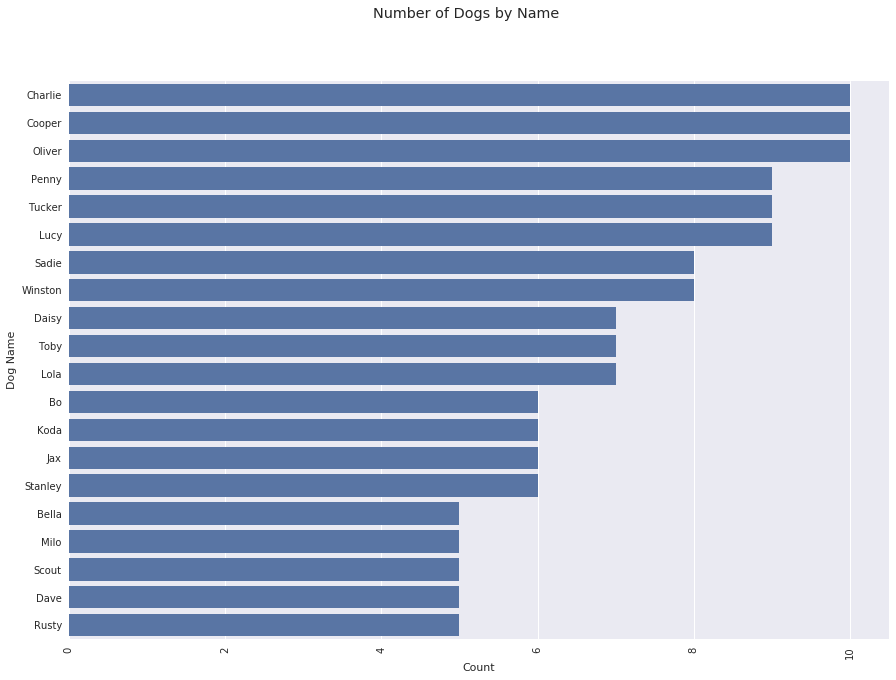

In [380]:
# Find count of dog names
plt.figure(figsize = [14.7,10.27])
base_color = sb.color_palette()[0]
data = we_rate_dogs
name_dog = data[(data['name'] !='None') & (data['name'] !='none')] 
sb.countplot(y = name_dog['name'] , color = base_color, order = name_dog['name'].value_counts().index[:20], orient='h')
plt.suptitle('Number of Dogs by Name')
plt.xticks(rotation ='vertical');
plt.xlabel('Count');
plt.ylabel('Dog Name');

### Observations

Interestingly there are 606 dogs with no name. Oliver, Charlie and Cooper are next three dog names with 10 counts sharing top position. Lucy, Pennie and Tucker are at second position with 9 counts while Sadie and Winston secured third position.

### Question 2 : What is the most common dog type?

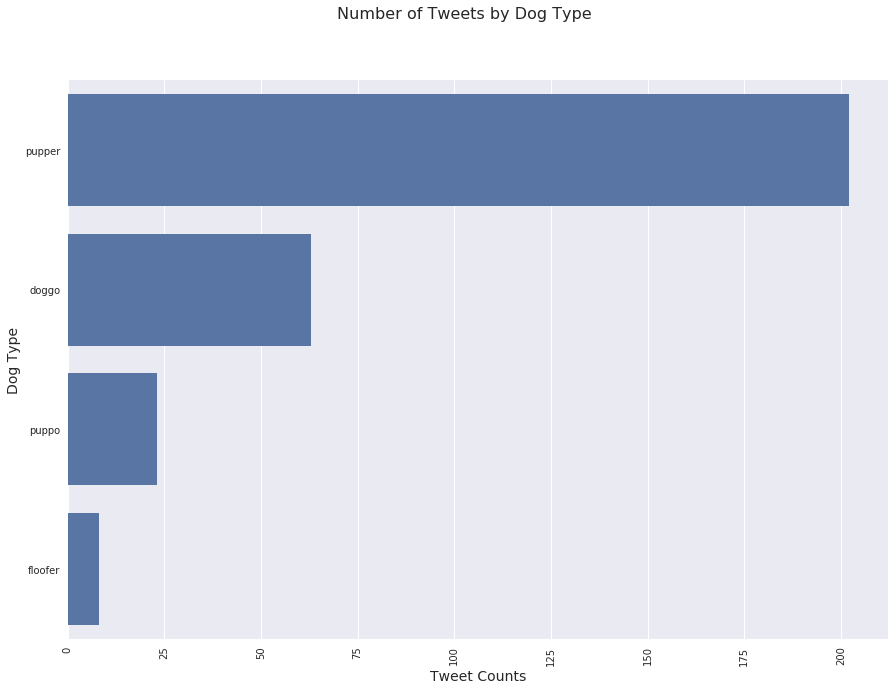

In [381]:
# Find count of dog stages
plt.figure(figsize = [14.7,10.27])
base_color = sb.color_palette()[0]
sb.countplot(data = we_rate_dogs, y = 'dog_type', color = base_color, order = we_rate_dogs['dog_type'].value_counts().index, orient='h')
plt.suptitle('Number of Tweets by Dog Type',fontsize = 16)
plt.xticks(rotation ='vertical');
plt.xlabel('Tweet Counts',fontsize = 14);
plt.ylabel('Dog Type',fontsize = 14);

#### Observations
Looks like pupper is the most common dog type among four types. 

### Question 3: How is rating distribution among tweets?

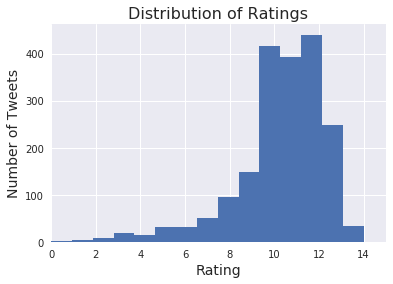

In [382]:
we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Distribution of Ratings', fontsize = 16)
plt.show();

### Obseravtions

1. The distribution looks like normal and mostly skewed towards left. 
2. Majority of tweets got rating that falls between 10-13.

## Question 4:Which breed got more tweets?

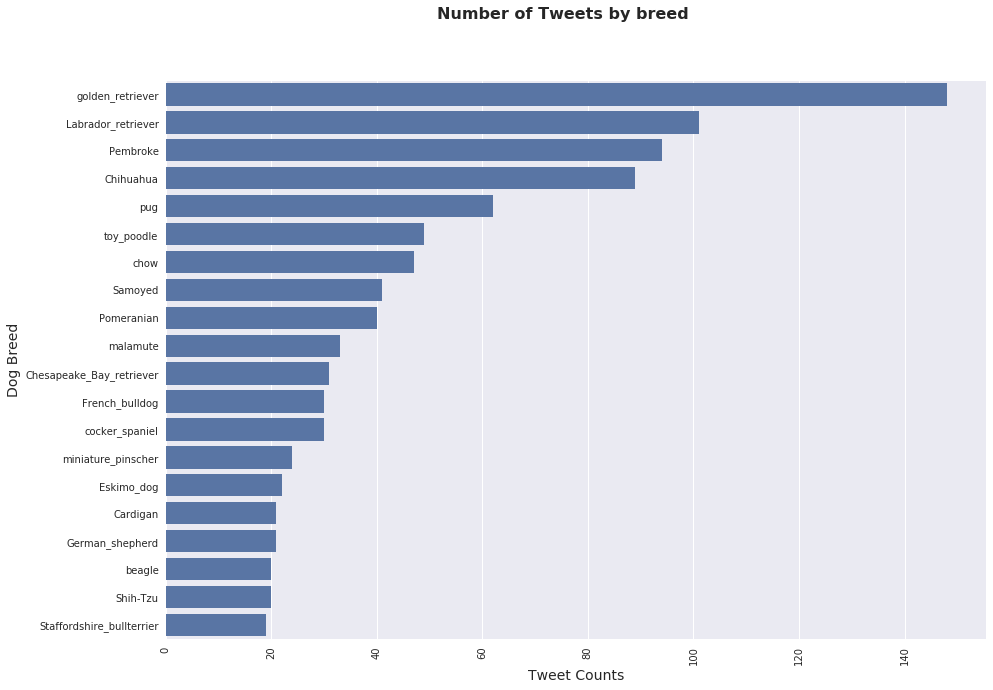

In [383]:
plt.figure(figsize = [14.7,10.27])
base_color = sb.color_palette()[0]
we_rate_dogs = we_rate_dogs[we_rate_dogs['breed']!='none']
order = we_rate_dogs['breed'].value_counts().index[:20]
sb.countplot(data = we_rate_dogs, y = 'breed', color = base_color, order = order, orient='h')
plt.suptitle('Number of Tweets by breed',fontsize = 16,weight = 'bold')
plt.xticks(rotation ='vertical');
plt.xlabel('Tweet Counts',fontsize = 14);
plt.ylabel('Dog Breed',fontsize = 14);

### Bivariate Analysis

In order to explore the correlation among the variables, let's create a pairplot and we are interested in numerical variables such as rating, retweet_count,favorite_count and confidence.

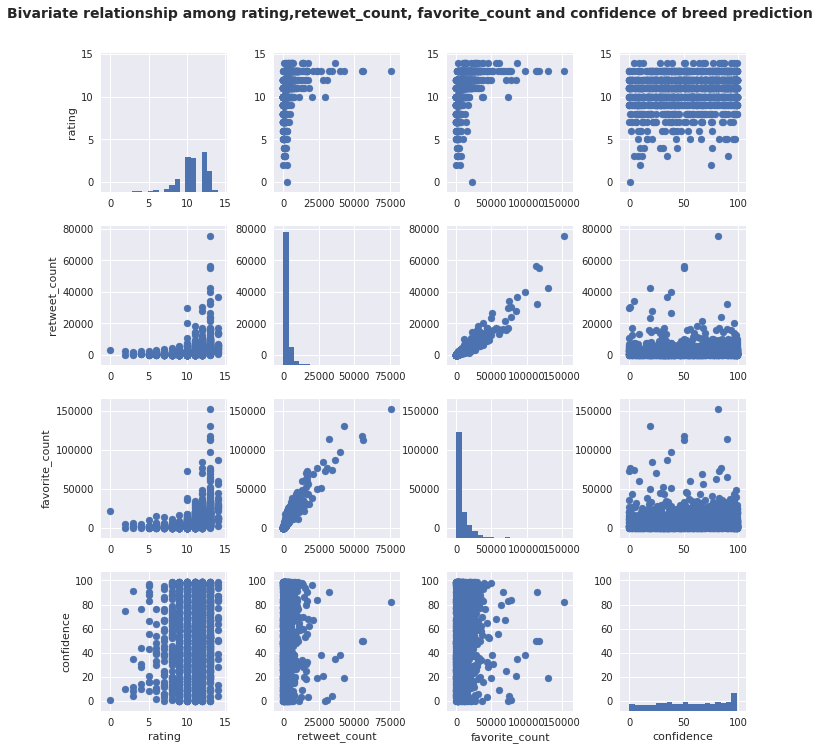

In [384]:
numeric_vars = ['rating','retweet_count','favorite_count','confidence']

g = sb.PairGrid(data = we_rate_dogs, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);
plt.suptitle('Bivariate relationship among rating,retewet_count, favorite_count and confidence of breed prediction',y =1.04,fontsize = 14,weight = 'bold');

### Observations
1. From the pairplot of numeric variables, we see strong positive relationship between favorite count and retweet count. 
2. Also rating has shown upward trend at higher favorite and retweeted count.
3. On the other hand confidence did not show any clear correlation with other variables. 

### Question 5: Average Retweet count and favorite count of dogs per month?

In [385]:
# Create a subset of the tweet_data_clean with the required variables
tweets_month = we_rate_dogs[['tweet_id', 'timestamp', 'retweet_count', 'favorite_count']]


In [386]:
# Create a months column using timestamp variable
tweets_month['month'] = we_rate_dogs['timestamp'].dt.month

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [387]:
# Create a variable for storing mean of retweet counts grouped by month
avg_retweets = tweets_month.sort_values('month').groupby('month').retweet_count.mean().astype(int)

In [388]:
# Create a variable for storing mean of favorite counts grouped by month
avg_favorites = tweets_month.sort_values('month').groupby('month').favorite_count.mean().astype(int)

In [389]:
# Define the locations and width for the bar graphs
index = np.arange(len(avg_retweets))
width = 0.4

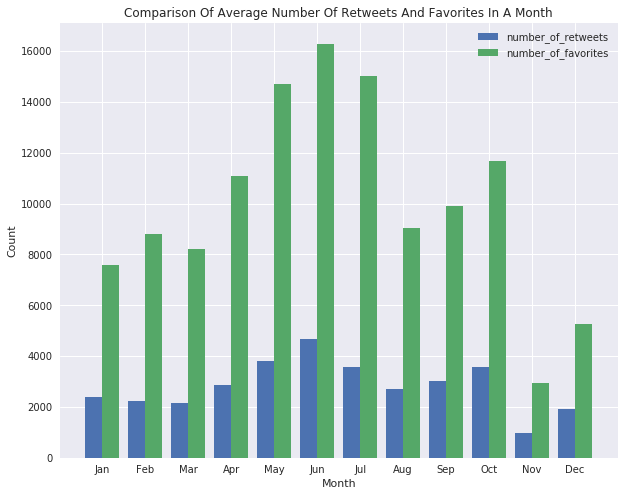

In [390]:
# two bar graphs settled in one
plt.figure(figsize = (10, 8))
#base_color = sb.color_palette()[0]
retweet_bars = plt.bar(index, avg_retweets, width, alpha = 1, color = sb.color_palette()[0], label = 'number_of_retweets')
favorite_bars = plt.bar(index+width, avg_favorites, width, alpha = 1, color = sb.color_palette()[1], label = 'number_of_favorites')

# title and labels
plt.title('Comparison Of Average Number Of Retweets And Favorites In A Month')
plt.xlabel('Month')
plt.ylabel('Count')
locations = index + (width/2)
x_axis_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(locations, x_axis_labels)

# Legend
plt.legend()

### Observations
1. The plot of retweets and favorite tweets shows that, average retweet count is less than favorite tweets.
2. May, June, July are the months when retweets and favorite tweets are frequent.
3. Highest average no of retweets happened in June and lowest was in November.
4. Highest average no of favorite tweets was also recorded in June and lowest in November

### Question 6: How is the average rating distribution among breeds?

In [391]:
retweet_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']

In [392]:
#retweet_counts_breed.breed.value_counts()
retweet_counts_breed.head()

,tweet_id,timestamp,rating,retweet_count,favorite_count,breed,confidence,name,dog_type,source,text
1,892177421306343426,2017-08-01 00:17:27,13,5557,30695,Chihuahua,32,Tilly,NaN,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,891815181378084864,2017-07-31 00:18:03,12,3680,23089,Chihuahua,71,Archie,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,891689557279858688,2017-07-30 15:58:51,13,7665,38744,Labrador_retriever,16,Darla,NaN,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,891327558926688256,2017-07-29 16:00:24,12,8267,37028,basset,55,Franklin,NaN,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
5,891087950875897856,2017-07-29 00:08:17,13,2767,18664,Chesapeake_Bay_retriever,42,None,NaN,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh


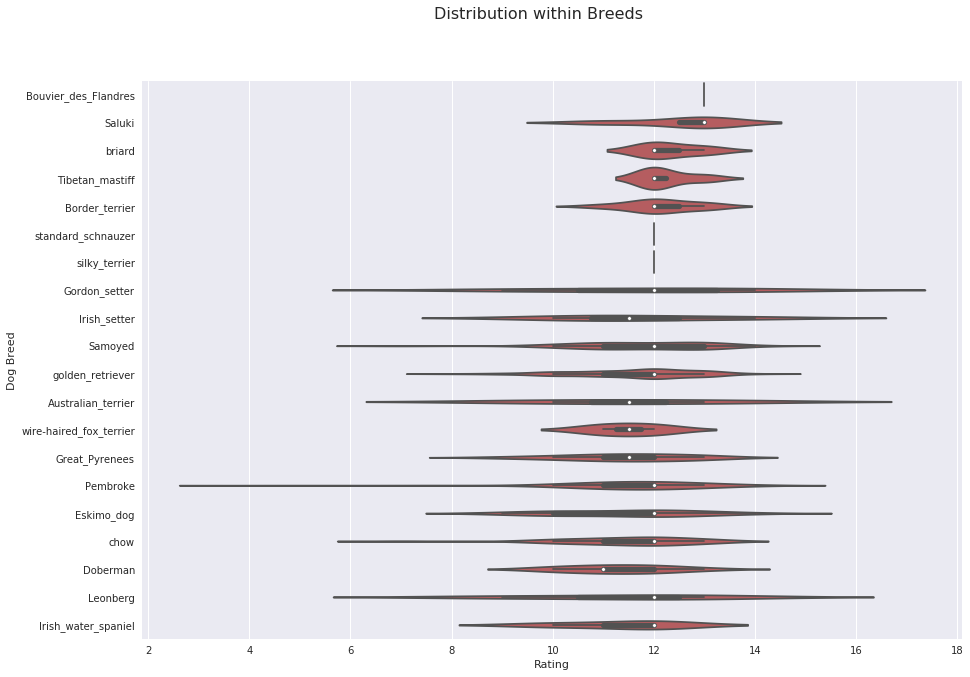

In [393]:
# Find count of dog breed
#retweet_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']

plt.figure(figsize = [14.7,10.27])
base_color = sb.color_palette()[2]
breed_order = retweet_counts_breed.groupby('breed')['rating'].mean().sort_values(ascending = False).index[:20]
sb.violinplot(x = retweet_counts_breed['rating'],y = retweet_counts_breed['breed'],order = breed_order,color = base_color)
plt.suptitle('Distribution within Breeds', fontsize = 16)
plt.xticks(rotation ='horizontal');
plt.xlabel('Rating');
plt.ylabel('Dog Breed');

### Observations
1. Average rating is again between 10-13 for most of the breeds although teh distribution varies a lot among breeds. Like Pembroke has lowest of around 2.7 and highest of 15.6(wide range) whereas Briard, Tibettan Mastiff are of ratings 11.5-14(short range).

### Multivariate Analysis

### Question 7: Are retweet counts and favorite counts related to dog rating?

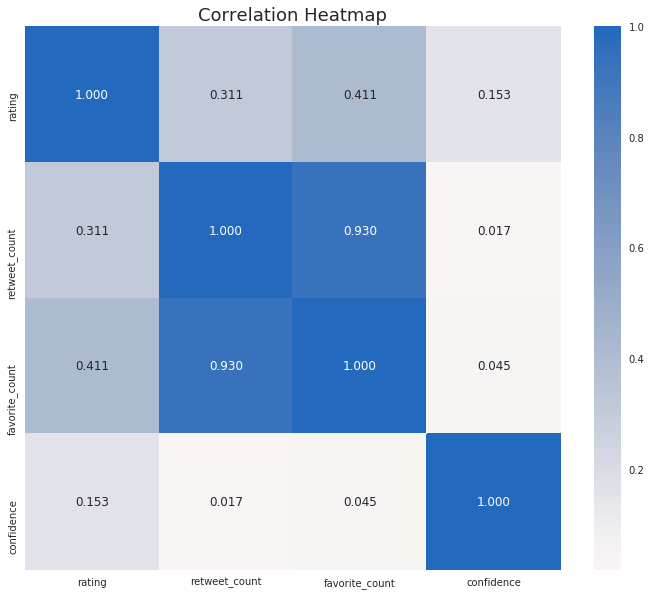

In [394]:
# Correlation plot
numeric_vars = ['rating','retweet_count','favorite_count','confidence']
plt.figure(figsize = [12,10])
heatmap = sb.heatmap(we_rate_dogs[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18});
plt.show()



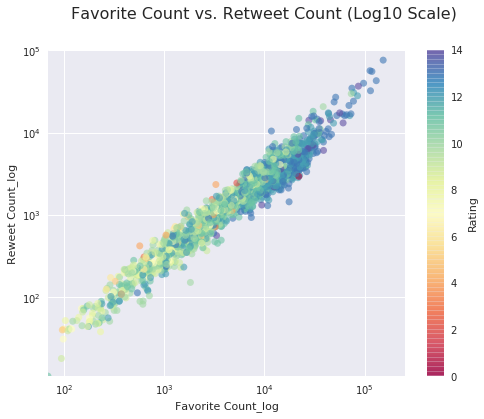

In [395]:
df = we_rate_dogs
plt.figure(figsize = [8,6])
cmap = cm.get_cmap('Spectral')
plt.scatter(df['favorite_count'], df['retweet_count'], c = df['rating'],cmap = cmap,edgecolor = 'None', alpha = 0.6)
plt.colorbar(label = 'Rating')
plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min(), df['favorite_count'].max() + 100000)
plt.ylim(df['retweet_count'].min(),df['retweet_count'].max() + 25000)
plt.xlabel('Favorite Count_log')
plt.ylabel('Reweet Count_log')
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)

plt.show();

### Observations

1. This is very clear from both heatmap and the colormap for retweet count and favorite count against rating that favorite count and retweet count are correlated with positive strength. 
2. Rating increased with higher number of retweets and favorite count which is expected.
3. People marked as favorite  thier loved dogs more than retweets.
4. Confidence has shown very weak correlation co-efficient value aganist retweet and favorite counts.